In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('/kaggle/input/hotel-booking-demand/hotel_bookings.csv')
df.info()
df.shape             #Loading and quick checking the shape and info of the dataset 
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


**Checking and handling the missing values**

In [3]:
#show missing values
df.isna().sum()

#common fixes
df['children']=df['children'].fillna(0)

df['agent']=df['agent'].fillna(0).astype(int)
df['company'] = df['company'].fillna(0).astype(int)

#adr value is zero so filter it 
df = df[df['adr']>0].copy()

#last checking the duplicate 
df.duplicated().sum()

31813

In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 117430 entries, 2 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           117430 non-null  object 
 1   is_canceled                     117430 non-null  int64  
 2   lead_time                       117430 non-null  int64  
 3   arrival_date_year               117430 non-null  int64  
 4   arrival_date_month              117430 non-null  object 
 5   arrival_date_week_number        117430 non-null  int64  
 6   arrival_date_day_of_month       117430 non-null  int64  
 7   stays_in_weekend_nights         117430 non-null  int64  
 8   stays_in_week_nights            117430 non-null  int64  
 9   adults                          117430 non-null  int64  
 10  children                        117430 non-null  float64
 11  babies                          117430 non-null  int64  
 12  meal                 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240,0,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240,0,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,0,0,0,Transient,107.0,0,0,Check-Out,2015-07-03


**Creating date columns and creating useful datetime fields**

In [5]:
#map month (string) to numeric

month_map={m:i for i,m in enumerate(["January","February","March","April","May","June",
                                       "July","August","September","October","November","December"],1)}
df['arrival_month_num']=df['arrival_date_month'].map(month_map)

#creating arriavl_date and booking_date

df['arrival_date'] = pd.to_datetime(dict(year=df['arrival_date_year'],
                                         month=df['arrival_month_num'],
                                         day=df['arrival_date_day_of_month']))
df['booking_date']=df['arrival_date']-pd.to_timedelta(df['lead_time'],unit = "D")

#total
df['total_nights'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
df['total_guest'] = df['adults'] + df['children'] + df['babies']
df['booking_revenue']=df['adr']*df['total_nights']
df['has_agent']=(df['agent']!=0).astype(int)
df['has_company']=(df['company']!=0).astype(int)

In [6]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117430 entries, 2 to 119389
Data columns (total 40 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           117430 non-null  object        
 1   is_canceled                     117430 non-null  int64         
 2   lead_time                       117430 non-null  int64         
 3   arrival_date_year               117430 non-null  int64         
 4   arrival_date_month              117430 non-null  object        
 5   arrival_date_week_number        117430 non-null  int64         
 6   arrival_date_day_of_month       117430 non-null  int64         
 7   stays_in_weekend_nights         117430 non-null  int64         
 8   stays_in_week_nights            117430 non-null  int64         
 9   adults                          117430 non-null  int64         
 10  children                        117430 non-null  float64     

# **Basic_level_question**

**For Q1,Q2,Q3,Q6,Q7 the answer is below**

Average lead time: 105.08433960657413
Cancellation rate: 0.37478497828493573
hotel
City Hotel      106.932788
Resort Hotel     96.769633
Name: adr, dtype: float64
country
PRT    47040
GBR    12055
FRA    10360
ESP     8489
DEU     7246
ITA     3749
IRL     3369
BEL     2334
BRA     2211
NLD     2100
Name: count, dtype: int64


<Axes: title={'center': 'Booking per month'}, xlabel='arrival_date'>

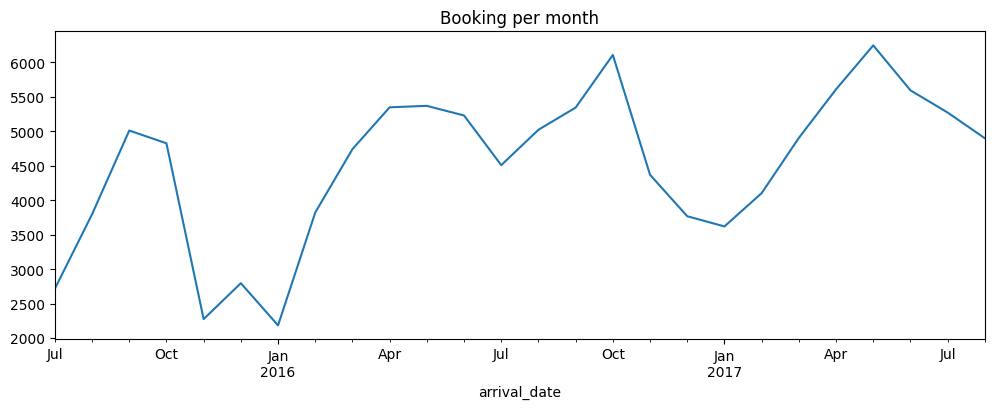

In [7]:
#Average lead time
print("Average lead time:",df['lead_time'].mean())

#cancellation rate
print("Cancellation rate:",df['is_canceled'].mean())

#ADR by hotel type
print(df.groupby('hotel')['adr'].mean())

#top countries
print(df['country'].value_counts().head(10))


#ploting: booking by month
monthly=df.groupby(df['arrival_date'].dt.to_period('M')).size()
monthly.plot(figsize=(12,4),title = 'Booking per month')

**Q4: Most common arrival month**

In [8]:
df['arrival_date'].dt.month_name().value_counts().idxmax()

'August'

**Q5: Average number of special requests per booking**

In [9]:
df['total_of_special_requests'].mean()

0.57103806523035

**Q8: Percentage of guests requiring car parking spaces**

In [10]:
pct_parking = (df['required_car_parking_spaces']>0).mean()
pct_parking

0.062232819552073576

**Q9: Average stay duration (week & weekend nights)**

In [11]:
df[['stays_in_week_nights','stays_in_weekend_nights']].mean()

stays_in_week_nights       2.521221
stays_in_weekend_nights    0.936422
dtype: float64

**Q10: How many bookings were made through travel agents?**

In [12]:
booking_by_agent = (df['agent']!= 0).sum()
booking_by_agent

102039

# **Medium_level_question**

**Q1-Cancellation rate per hotel type**

In [13]:
df.groupby('hotel')['is_canceled'].mean().sort_values(ascending = False)

hotel
City Hotel      0.422071
Resort Hotel    0.280808
Name: is_canceled, dtype: float64

**Q2-Average ADR per market segment**

In [14]:
df.groupby('market_segment')['adr'].mean().sort_values(ascending = False)

market_segment
Online TA        117.963616
Direct           117.685742
Aviation         102.743203
Offline TA/TO     88.568907
Groups            80.507935
Corporate         70.449962
Complementary     34.040794
Undefined         15.000000
Name: adr, dtype: float64

**Q3-Relationship between lead time and cancellation rate**

/tmp/ipykernel_13/2394421624.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lead_cancel = df.groupby('lead_bin')['is_canceled'].mean()


<Axes: title={'center': 'Cancellation rate by lead time bin'}, xlabel='lead_bin'>

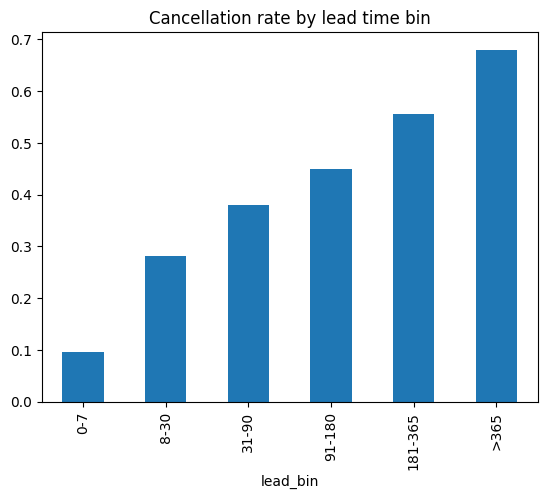

In [15]:
df['lead_bin'] = pd.cut(df['lead_time'],bins = [-1,7,30,90,180,365,2000],
                       labels = ['0-7','8-30','31-90','91-180','181-365','>365'])
lead_cancel = df.groupby('lead_bin')['is_canceled'].mean()
lead_cancel.plot.bar(title = "Cancellation rate by lead time bin")

**Q4-Distribution channel with highest bookings**

In [16]:
df['distribution_channel'].value_counts()

distribution_channel
TA/TO        96913
Direct       13838
Corporate     6485
GDS            189
Undefined        5
Name: count, dtype: int64

**Q5-Average previous cancellations by hotel type**

In [17]:
df.groupby('hotel')['previous_cancellations'].mean()


hotel
City Hotel      0.078621
Resort Hotel    0.103516
Name: previous_cancellations, dtype: float64

**Q6-Trend of ADR over the years**

<Axes: title={'center': 'Avg ADR by year'}, xlabel='arrival_date_year'>

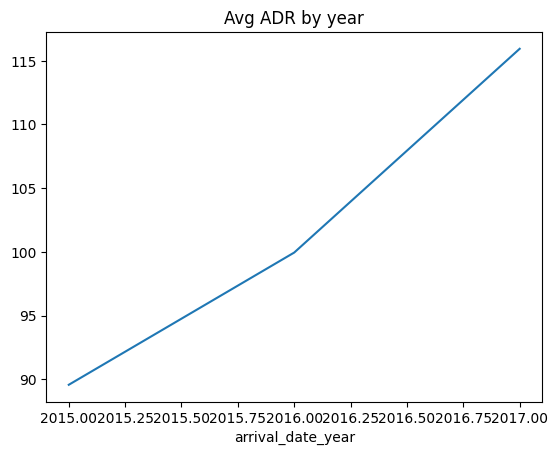

In [18]:
df.groupby('arrival_date_year')['adr'].mean().plot.line(title = "Avg ADR by year")

**Q7-Which month has highest revenue?**

<Axes: title={'center': 'Monthly Revenue (ADR * nights)'}, xlabel='arrival_date'>

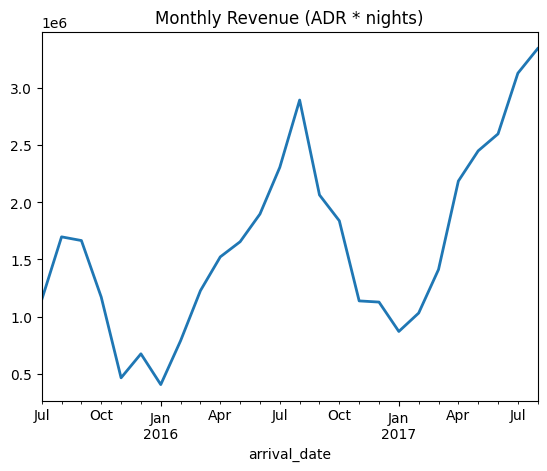

In [19]:
rev_by_month = df.groupby(df['arrival_date'].dt.to_period('M'))['booking_revenue'].sum()
rev_by_month.sort_values(ascending=False).head(10)
# plot:
rev_by_month.plot(linewidth=2, title='Monthly Revenue (ADR * nights)')


**Q8-Impact of special requests on ADR**

<Axes: title={'center': 'ADR by special request'}, xlabel='total_of_special_requests'>

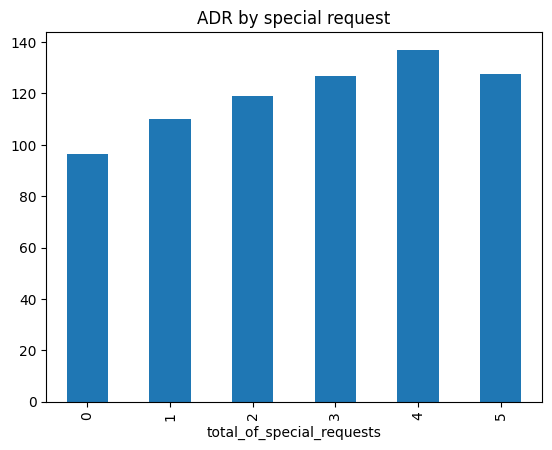

In [20]:
df.groupby('total_of_special_requests')['adr'].mean().plot.bar(title = 'ADR by special request')

**Q9-Average stay for repeated vs new guests**

In [21]:
df.groupby('is_repeated_guest')[['total_nights']].mean()

,total_nights
is_repeated_guest,
0,3.495756
1,2.128323


**Q10-Most booked room types**

In [22]:
df['reserved_room_type'].value_counts().head(10)

reserved_room_type
A    84573
D    19005
E     6423
F     2824
G     2006
B     1085
C      913
H      595
L        6
Name: count, dtype: int64

**Advance_level_question**

**Q1-Time / Seasonality analysis (cancellations and ADR)**

In [23]:
monthly = df.groupby(df['arrival_date'].dt.to_period('M')).agg(
    cancellations = ('is_canceled','mean'),
    revenue = ('booking_revenue','sum'),
    avg_adr = ('adr','mean')
)
monthly

,cancellations,revenue,avg_adr
arrival_date,,,
2015-07,0.462049,1146861.53,100.069293
2015-08,0.420137,1698555.34,108.575148
2015-09,0.414055,1666155.39,96.806277
2015-10,0.353441,1170206.08,81.070612
2015-11,0.211522,462989.38,62.338518
2015-12,0.345259,673348.84,77.392268
2016-01,0.251947,403694.85,66.696148
2016-02,0.347120,788225.29,71.405217
2016-03,0.309559,1226927.65,80.487535
